In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the dataset
train = pd.read_csv('./EmbeddedData/TGAN_PCA.csv')
test = pd.read_csv('./EmbeddedData/test_PCA.csv')

In [5]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [6]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.839182,-0.544709,0.170018,0.131365,0.223332,0.027037,1.113978,0.510675,-0.188745,-0.560887,...,-0.124368,-0.004041,-0.012249,0.030095,0.003800,0.024302,-0.048936,0.029287,-0.021757,-0.012692
1,-0.829493,-0.428876,0.098825,-0.239842,-0.154194,0.081773,1.541361,-0.550114,0.568914,0.422970,...,-0.039884,-0.015809,-0.032723,0.031909,-0.020306,0.041159,-0.087193,0.057921,-0.029615,-0.003098
2,-0.688571,-0.113338,0.646605,-0.308267,-0.033286,-0.027234,0.870376,0.155055,-0.878902,-0.081501,...,0.238136,-0.035144,0.006161,0.014326,-0.015933,0.045172,-0.076038,0.095767,-0.046515,-0.018244
3,0.306544,0.123205,-0.082350,-0.035470,-0.102997,-0.218023,-0.150508,0.125678,1.547866,0.436972,...,-0.189905,0.033434,0.079424,-0.017976,-0.075515,0.142578,-0.390652,0.487302,-0.179243,-0.149607
4,-0.449097,-0.853934,0.758696,0.526381,0.213494,-0.828885,-1.005560,-0.299597,-0.196834,0.124163,...,0.073344,0.007125,-0.002982,0.003096,0.004597,0.017624,0.013170,-0.020508,-0.008058,0.002918


In [4]:
# Splitting the dataset into the Training set and Test set  
#to use sklearn we need data in matrix not in data frame
# from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
# Feature Scaling #no need feature scaling for DT as they ar not based on euclidean dist and also will be easy to interpret
# from sklearn.preprocessing import StandardScaler #but to visalize with high reolution(0.01),feature scaling helps to execute lot faster
# sc = StandardScaler()                       #so we are keeping the feature scaling, but we can also remove feature scaling
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Decision Tree Classification

In [6]:
# Fitting Decision Tree to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[19504 64536]
 [ 2779  8828]]
Accuracy Score is 0.2962
Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.23      0.37     84040
           1       0.12      0.76      0.21     11607

    accuracy                           0.30     95647
   macro avg       0.50      0.50      0.29     95647
weighted avg       0.78      0.30      0.35     95647

AUC-ROC: 0.49632773834923016
LOGLOSS Value is 24.3084


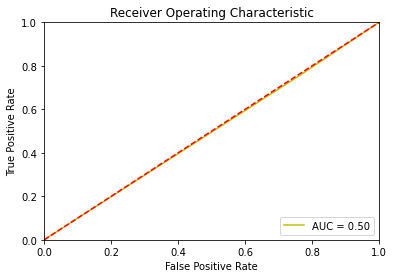

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classification

In [9]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion= 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[10078 73962]
 [ 1254 10353]]
Accuracy Score is 0.2136
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.12      0.21     84040
           1       0.12      0.89      0.22     11607

    accuracy                           0.21     95647
   macro avg       0.51      0.51      0.21     95647
weighted avg       0.80      0.21      0.21     95647

AUC-ROC: 0.5059404166854784
LOGLOSS Value is 27.1616


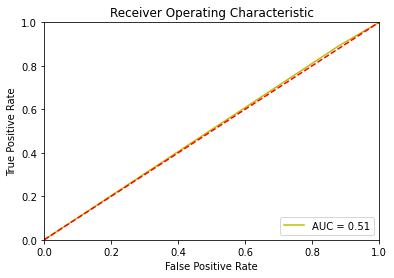

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGBoost

In [12]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

In [13]:
# fit the model on the whole dataset
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier()

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[23963 60077]
 [ 2641  8966]]
Accuracy Score is 0.3443
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.29      0.43     84040
           1       0.13      0.77      0.22     11607

    accuracy                           0.34     95647
   macro avg       0.52      0.53      0.33     95647
weighted avg       0.81      0.34      0.41     95647

AUC-ROC: 0.5288014606926748
LOGLOSS Value is 22.6484


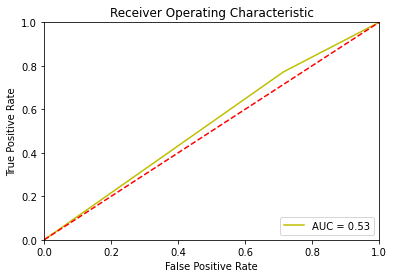

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# LigthGBM

In [16]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [17]:
# fit the model on the whole dataset
classifier = LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

In [18]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[10117 73923]
 [ 1236 10371]]
Accuracy Score is 0.2142
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.12      0.21     84040
           1       0.12      0.89      0.22     11607

    accuracy                           0.21     95647
   macro avg       0.51      0.51      0.21     95647
weighted avg       0.80      0.21      0.21     95647

AUC-ROC: 0.5069478432097161
LOGLOSS Value is 27.1410


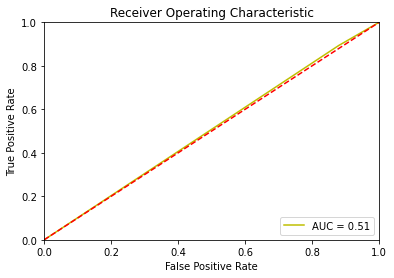

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Machine

In [20]:
# gradient boosting for classification in scikit-learn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

In [21]:
# fit the model on the whole dataset
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [22]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

Confusion Matrix : 
 [[29440 54600]
 [ 3730  7877]]
Accuracy Score is 0.3902
Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.35      0.50     84040
           1       0.13      0.68      0.21     11607

    accuracy                           0.39     95647
   macro avg       0.51      0.51      0.36     95647
weighted avg       0.80      0.39      0.47     95647

AUC-ROC: 0.5144757875803007
LOGLOSS Value is 21.0638


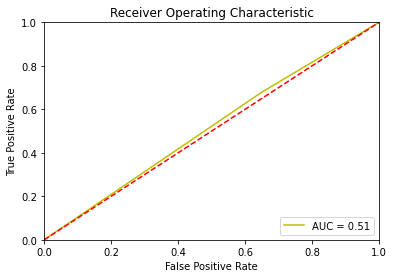

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, log_loss, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()